# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
# your answer here
import pandas as pd
import matplotlib as plt
import seaborn as sns

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
# your answer here
employee = pd.read_csv(r'C:\Users\joanr\Ironhack\Module 2\Week 4\Labs\lab-pivot-table-and-correlation\your_code\data\Employee.csv')

In [3]:
employee.head(9)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [4]:
# Method 1
# your answer here
mean_salary = employee.groupby('Department')['Salary'].mean()
mean_salary


Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [5]:
# Method 2
# your answer here
employee.pivot_table(index = ['Department'], values = ['Salary'], aggfunc = ['mean'])

,mean
,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [6]:
# your answer here
#print(employee.pivot_table(index = ['Department', 'Title'], values = ['Salary'], aggfunc = ['mean']).stack()) worst solution
employee.pivot_table(index = ['Department'], columns =  ['Title'], values = ['Salary'], aggfunc = ['mean'])

mean                  
           Salary                  
Title          VP analyst associate
Department                         
HR           70.0    32.5       NaN
IT           70.0    32.5      60.0
Sales         NaN     NaN      55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [7]:
# your answer here
employee.pivot_table(index = ['Title'], values = ['Salary', 'Years'], aggfunc = ['mean'])

mean      
              Salary Years
Title                     
VP         70.000000  8.00
analyst    32.500000  2.25
associate  56.666667  4.00

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [8]:
# your answer here
employee.pivot_table(index = ['Title'], values = ['Salary'], aggfunc = ['count', 'mean'])

,count,mean
,Salary,Salary
Title,,
VP,2,70.000000
analyst,4,32.500000
associate,3,56.666667


#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [9]:
# your answer here
employee.pivot_table(index = ['Department', 'Title'], values = ['Salary'], aggfunc = ['median', 'min', 'max', 'std'])
#Everything is well displayed, however the std is null when only one employee was considered.

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [10]:
# your answer here
employee.pivot_table(index = ['Department', 'Title'], values = ['Salary'], aggfunc = ['median', 'min', 'max', 'std']).fillna(0.0)

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [11]:
# your answer here
employee.pivot_table(index = ['Department'], values = ['Salary'], aggfunc = ['sum', 'count']) # len also gives the answer.

,sum,count
,Salary,Salary
Department,,
HR,135,3
IT,195,4
Sales,110,2


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [12]:
# your answer here
employee.pivot_table(index = ['Department', 'Title'], values = ['Years', 'Salary'], aggfunc = ['sum', 'mean']) # len also gives the answer.


sum         mean      
                     Salary Years Salary Years
Department Title                              
HR         VP            70     8   70.0   8.0
           analyst       65     6   32.5   3.0
IT         VP            70     8   70.0   8.0
           analyst       65     3   32.5   1.5
           associate     60     7   60.0   7.0
Sales      associate    110     5   55.0   2.5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [13]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [14]:
# your answer here
fitbit = pd.read_csv(r'C:\Users\joanr\Ironhack\Module 2\Week 4\Labs\lab-pivot-table-and-correlation\your_code\data\Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [15]:
# your answer here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [16]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [17]:
fitbit[['Steps','Minutes Very Active']].corr()

,Steps,Minutes Very Active
Steps,1.000000,0.571452
Minutes Very Active,0.571452,1.000000


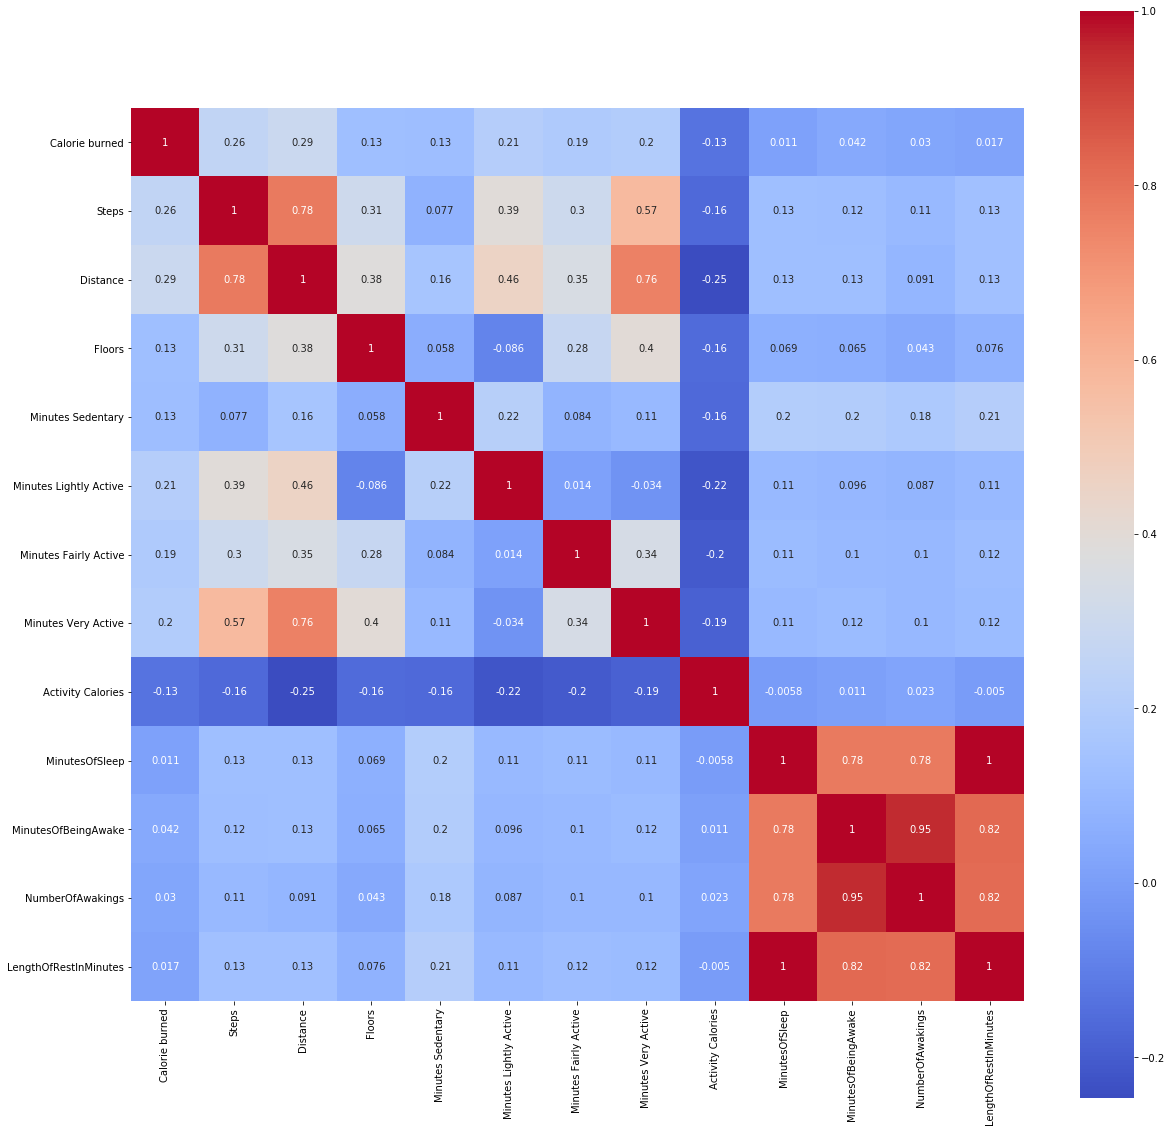

In [18]:
plt.rcParams['figure.figsize'] = (20.0, 20.0)
sns.heatmap(fitbit.corr(),annot=True, cmap = 'coolwarm', xticklabels = fitbit.corr().columns,yticklabels = fitbit.corr().columns, square = True)

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

"Another way:\nimport seaborn as sns\nsns.lmplot(x='Steps', y='Minutes Very Active', data=fitbit)"

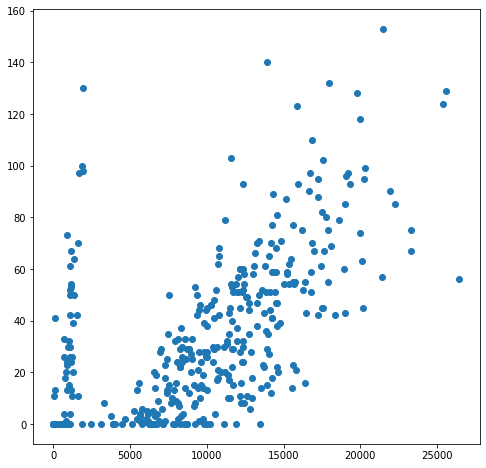

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.scatter(x=fitbit['Steps'], y=fitbit['Minutes Very Active'])

'''Another way:
import seaborn as sns
sns.lmplot(x='Steps', y='Minutes Very Active', data=fitbit)'''

#### What can you say about Minute Very Active and Steps? Write a comment below

In [20]:
# your answer here
#The image suggests they moderately positively correlated (corr = 0.57), the # of steps increase by each minute we are very active.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [21]:
fitbit[['Steps','Minutes Sedentary']].corr()

,Steps,Minutes Sedentary
Steps,1.000000,0.076906
Minutes Sedentary,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

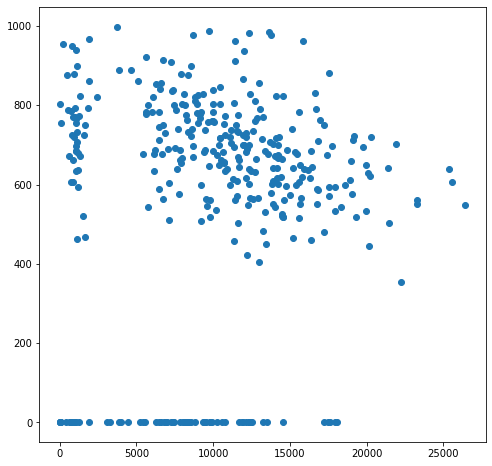

In [22]:
# your answer here
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.scatter(x=fitbit['Steps'], y=fitbit['Minutes Sedentary'])

#We can say that these variables presente a poor correlation (0.07). There is no relation at all.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [23]:
# your answer here
fitbit[['Steps','MinutesOfSleep']].corr()

,Steps,MinutesOfSleep
Steps,1.000000,0.130986
MinutesOfSleep,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

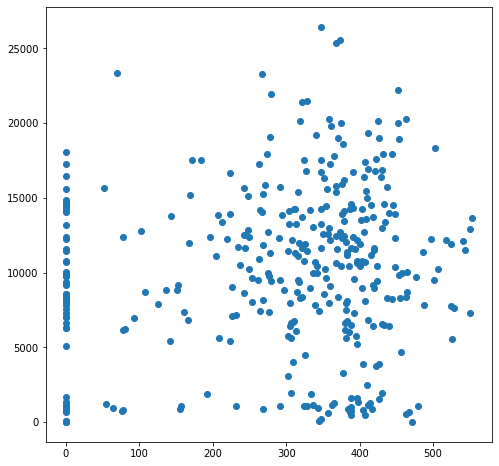

In [24]:
# your answer here
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])

#There's also a very poor or no correlation at all between these variables.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [25]:
# your answer here
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit = fitbit[column].corr()
cor_fit.sort_values(by = 'Steps', ascending = False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [26]:
# your answer here

#Minutes Very Active and Floors are the variables that have the highest correlation with Steps.

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [27]:
# your answer here
time_grades = pd.read_csv(r'C:\Users\joanr\Ironhack\Module 2\Week 4\Labs\lab-pivot-table-and-correlation\your_code\data\Time_Grades.csv')

In [28]:
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

Text(0, 0.5, 'Frequency')

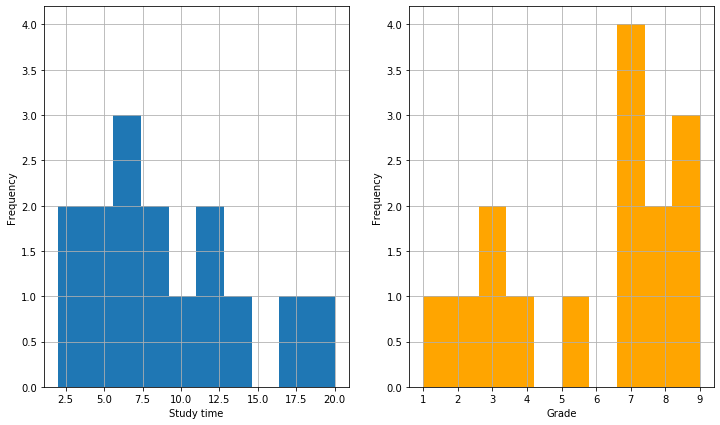

In [63]:
f = plt.figure(figsize = (12,7))
studytime_hist = time_grades['Study time']
grade_hist = time_grades['Grade']

a1 = plt.subplot(1, 2, 1)
b1.hist(bins = 10)
plt.xlabel("Study time")
plt.ylabel("Frequency")

a2 = plt.subplot(1, 2, 2, sharey = a1)
b2.hist(bins = 10, color = 'orange')
plt.xlabel("Grade")
plt.ylabel("Frequency")

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [32]:
# your answer here
time_grades['Grade'].corr(time_grades['Study time'])
#time_grades[['Study time','Grade']].corr() is another way to do it

0.7980456073578858

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

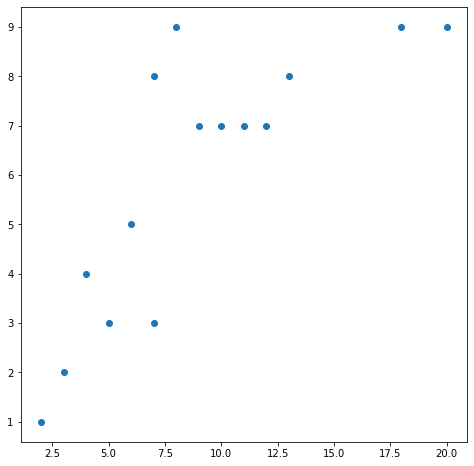

In [33]:
# your answer here
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.scatter(x = time_grades['Study time'], y = time_grades['Grade'])
#As can be observed by the correlation value above (0.79), the Study time and the Grade are highly positively correlated.

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [34]:
# your answer here

'''Pearson method is used to evaluate only linear relations between variables, where these variable follow a normal distribution.
The Spearman method is used for linear and non-linear(monotonic) correlations(how well the relationship between two variables can be described),
Spearman works with rank-ordered data, while pearson works with raw data. Neither of these methods should be used for relations
that are not linear nor monotic.'''


'Pearson method is used to evaluate only linear relations between variables, where these variable follow a normal distribution.\nThe Spearman method is used for linear and non-linear(monotonic) correlations(how well the relationship between two variables can be described),\nSpearman works with rank-ordered data, while pearson works with raw data. Neither of these methods should be used for relations\nthat are not linear nor monotic.'